In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Διαβάζω το dataset από το drive μου

In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/kathimerini.csv')

In [ ]:
df.head()

,site,url,section,title,date,Author,full_text,Media
0,newsbomb.gr,https://www.kathimerini.gr/society/562557544/d...,NaN,Δήμαρχος Υδρας: «Τα ζώα εργασίας αποτελούν ανα...,2023-08-07T18:45:00+03:00,Newsroom,«Γίνεται 200 χρόνια στο νησί. Δεν παραβιάζεται...,False
1,newsbomb.gr,https://www.kathimerini.gr/society/562557586/p...,NaN,Πύρινα μέτωπα σε Τρίπολη και Σέρρες,2023-08-07T18:10:04+03:00,Newsroom,Μάχη με τις φλόγες δίνουν επίγειες και εναέριε...,False
2,newsbomb.gr,https://www.kathimerini.gr/society/562557565/t...,NaN,Το 23% της Αττικής κάηκε μέσα σε 7 χρόνια,2023-08-07T18:00:20+03:00,Newsroom,Τα περισσότερα στρέμματα κάηκαν το 2021 από τι...,False
3,newsbomb.gr,https://www.kathimerini.gr/society/562557361/i...,NaN,Η μεγάλη διαδρομή του Ντέμπα από το Μάλι στη Φ...,2023-08-07T17:50:52+03:00,Ελβίρα Κρίθαρη,Η ιστορία του ασυνόδευτου πρόσφυγα από το Μάλι...,False
4,newsbomb.gr,https://www.kathimerini.gr/society/562557505/e...,NaN,ΕΟΦ: Απαγόρευση διακίνησης συμπληρώματος διατρ...,2023-08-07T17:20:21+03:00,Newsroom,Ανιχνεύτηκε μη εγκεκριμένη ουσία Την απαγόρευσ...,False


Καθαρίζω τις στήλες title, full_text από na values

In [3]:
df = df.dropna(subset=['title'])
df = df.dropna(subset=['full_text'])

Συγχωνεύω τις στήλες 'title', 'full_text' σε μια στήλη text η οποία δηλαδή θα περιέχει το συνολικό κομμάτι κειμένου που περιέχεται σε κάθε άρθρο

In [4]:
df['text'] = df[['title', 'full_text']].agg('.'.join, axis=1)

Καθαρίζω τη νέα στήλη text από na values

In [5]:
df = df.dropna(subset=['text'])

Δημιουργώ ένα short version του dataframe το οποίο αποτελείται από τις ίδιες στήλες εκτός από τις στήλες url, section

In [6]:
short_df = df
short_df.drop(['url', 'section'], axis='columns', inplace=True)

Καθαρίζω τη στήλη 'text' από όλους τους χαρακτήρες αλλαγής γραμμής

In [7]:
short_df['text'] = short_df['text'].str.replace('/n', '')

In [ ]:
short_df.head()

,site,title,date,Author,full_text,Media,text
0,newsbomb.gr,Δήμαρχος Υδρας: «Τα ζώα εργασίας αποτελούν ανα...,2023-08-07T18:45:00+03:00,Newsroom,«Γίνεται 200 χρόνια στο νησί. Δεν παραβιάζεται...,False,Δήμαρχος Υδρας: «Τα ζώα εργασίας αποτελούν ανα...
1,newsbomb.gr,Πύρινα μέτωπα σε Τρίπολη και Σέρρες,2023-08-07T18:10:04+03:00,Newsroom,Μάχη με τις φλόγες δίνουν επίγειες και εναέριε...,False,Πύρινα μέτωπα σε Τρίπολη και Σέρρες.Μάχη με τι...
2,newsbomb.gr,Το 23% της Αττικής κάηκε μέσα σε 7 χρόνια,2023-08-07T18:00:20+03:00,Newsroom,Τα περισσότερα στρέμματα κάηκαν το 2021 από τι...,False,Το 23% της Αττικής κάηκε μέσα σε 7 χρόνια.Τα π...
3,newsbomb.gr,Η μεγάλη διαδρομή του Ντέμπα από το Μάλι στη Φ...,2023-08-07T17:50:52+03:00,Ελβίρα Κρίθαρη,Η ιστορία του ασυνόδευτου πρόσφυγα από το Μάλι...,False,Η μεγάλη διαδρομή του Ντέμπα από το Μάλι στη Φ...
4,newsbomb.gr,ΕΟΦ: Απαγόρευση διακίνησης συμπληρώματος διατρ...,2023-08-07T17:20:21+03:00,Newsroom,Ανιχνεύτηκε μη εγκεκριμένη ουσία Την απαγόρευσ...,False,ΕΟΦ: Απαγόρευση διακίνησης συμπληρώματος διατρ...


In [8]:
import datetime as Datetime

In [9]:
pd.set_option('display.max_colwidth', None)

In [10]:
short_df['date'] = pd.to_datetime(short_df.date , format='%Y-%m-%d %H:%M')

In [11]:
import numpy as np

Εξάγω τη μέρα, μήνα, χρόνο, ώρα, λεπτά από τη στήλη date


In [12]:
short_df['Day'] = pd.DatetimeIndex(short_df['date']).day
short_df['Day'] = short_df['Day'].replace('nan', 0)
short_df['Month'] = pd.DatetimeIndex(short_df['date']).month
short_df['Year'] = pd.DatetimeIndex(short_df['date']).year
short_df['Hour'] = pd.DatetimeIndex(short_df['date']).hour
short_df['Minute'] = pd.DatetimeIndex(short_df['date']).minute

<Axes: title={'center': 'KATHIMERINI:\n\nΑριθμός κειμένων ανά αρθρογράφο'}>

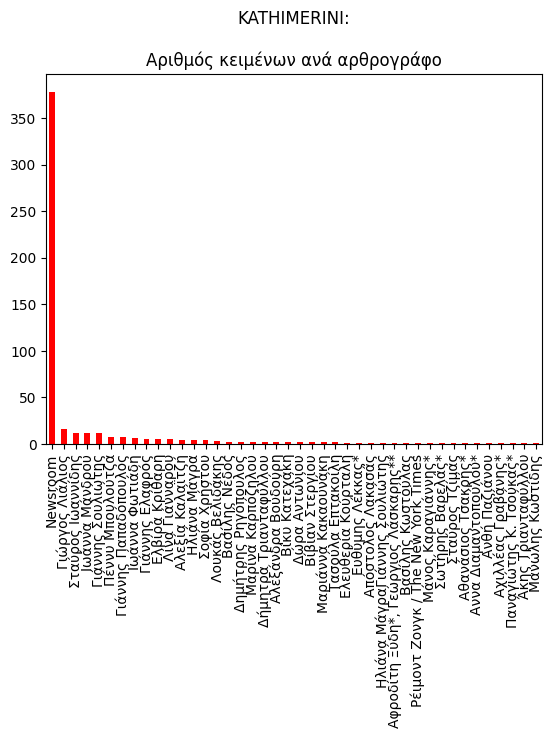

In [ ]:
short_df['Author'].value_counts().plot(kind='bar', title= 'KATHIMERINI:\n\nΑριθμός κειμένων ανά αρθρογράφο', color = 'r')

Αφαιρώ από το dataset όλες τις τιμές Newsroom στη στήλη Author

In [13]:
short_df.loc[short_df['Author'].str.contains('Newsroom', na=False), 'Author'] = np.nan

Παρουσιάζω μια πίτα που μας δείχνει τα άρθρα ανά ημέρα

<Axes: title={'center': 'KATHIMERINI:\n\nΑριθμός κειμένων ανά αρθρογράφο'}>

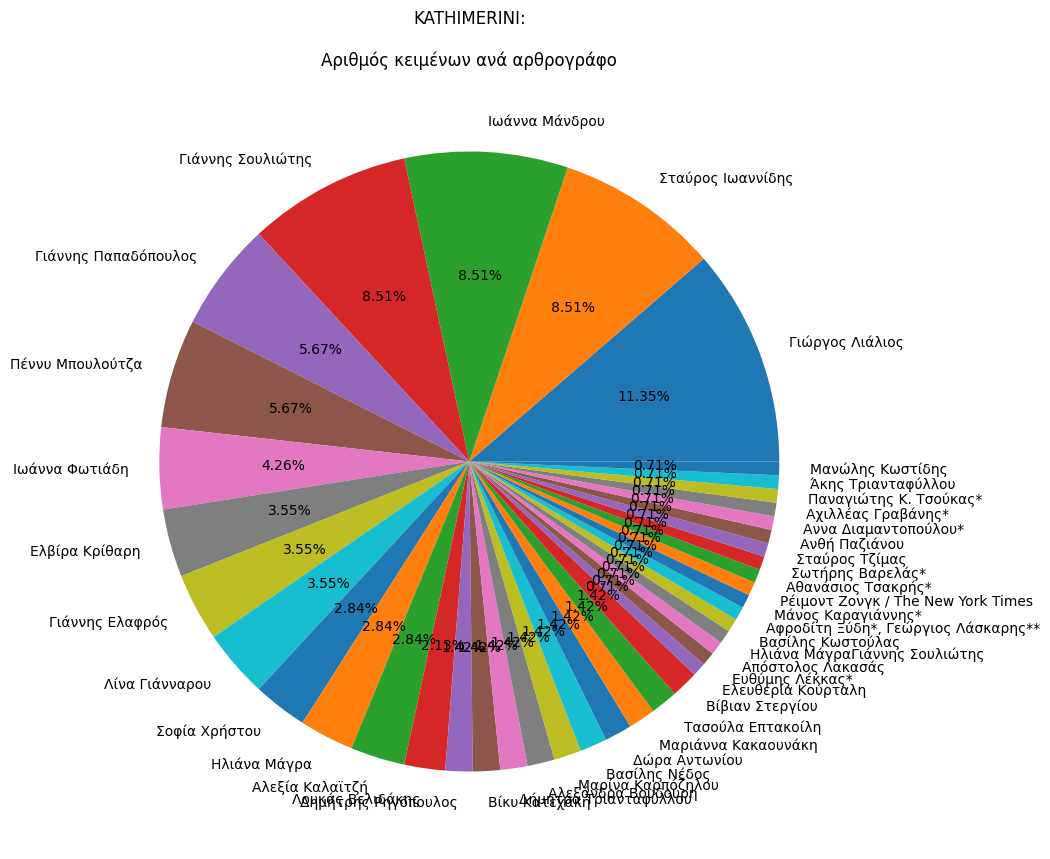

In [14]:
short_df['Author'].value_counts().plot(kind='pie', title= 'KATHIMERINI:\n\nΑριθμός κειμένων ανά αρθρογράφο', figsize=(10,14), label='', autopct='%1.2f%%')

<Axes: title={'center': 'KATHIMERINI:\n\nΑριθμός κειμένων ανά αρθρογράφο'}>

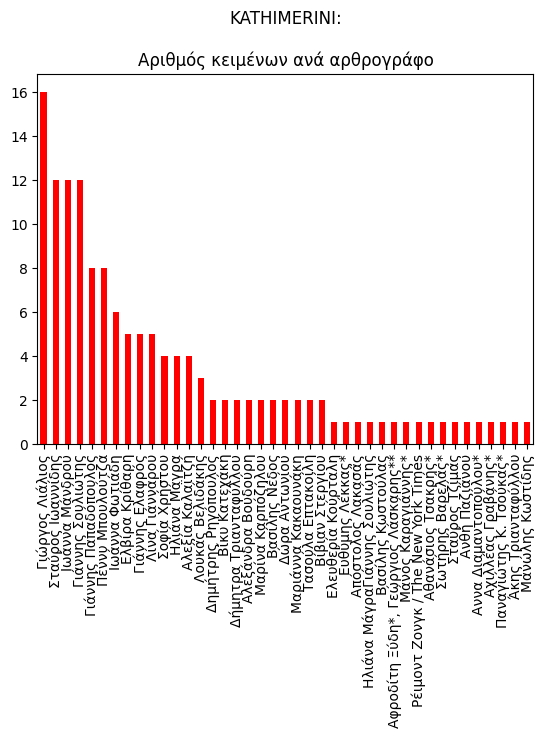

In [ ]:
short_df['Author'].value_counts().plot(kind='bar', color = 'r', title= 'KATHIMERINI:\n\nΑριθμός κειμένων ανά αρθρογράφο')

Εξάγω τις λέξεις που περιλαμβάνουν μόνο κεφαλαία γράμματα από τη στήλη title

In [ ]:
data = []

for row in short_df['title']:
  words = list(filter(lambda word: not any(char.isdigit()
                                         for char in word), row.split()))

  data.append(sum(word.isupper() for word in words))

short_df['upper_title'] = data

<Axes: title={'center': 'KATHIMERINI:\n\n0 λέξεις με κεφαλαία στο τίτλο, 1 λέξη , 2 λέξεις, 3 λέξεις'}>

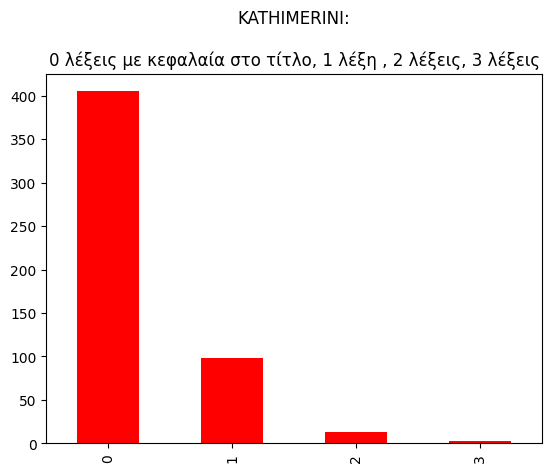

In [ ]:
short_df['upper_title'].value_counts().plot(kind='bar', color = 'r', title='KATHIMERINI:\n\n0 λέξεις με κεφαλαία στο τίτλο, 1 λέξη , 2 λέξεις, 3 λέξεις')

Εξάγω τις λέξεις που περιλαμβάνουν μόνο κεφαλαία γράμματα από τη στήλη text

In [ ]:
data = []

for row in short_df['text']:
  words = list(filter(lambda word: not any(char.isdigit()
                                         for char in word), row.split()))

  data.append(sum(word.isupper() for word in words))

short_df['upper_text'] = data

<Axes: title={'center': 'KATHIMERINI:\n\nΆθροισμα κειμένων με κεφαλαίες λέξεις ανά ημέρα'}>

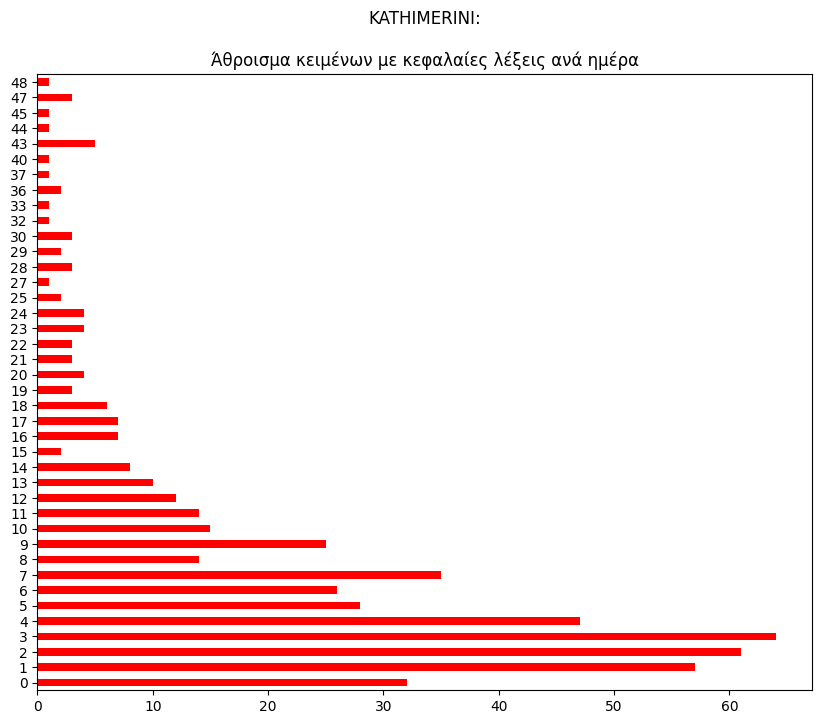

In [ ]:
short_df['upper_text'].value_counts(ascending=True).sort_index(ascending=True).plot(kind='barh', color = 'r', title= 'KATHIMERINI:\n\nΆθροισμα κειμένων με κεφαλαίες λέξεις ανά ημέρα', figsize=(10,8))

<Axes: title={'center': 'KATHIMERINI:\n\nΑριθμός άρθρων που περιέχουν μέσα'}>

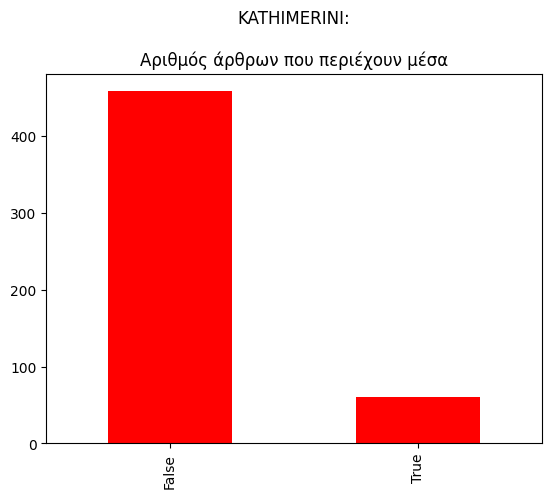

In [ ]:
short_df['Media'].value_counts().plot(kind='bar', color = 'r', title= 'KATHIMERINI:\n\nΑριθμός άρθρων που περιέχουν μέσα')

<Axes: title={'center': 'KATHIMERINI:\n\nΑριθμός άρθρων που περιέχουν μέσα'}, ylabel='Media'>

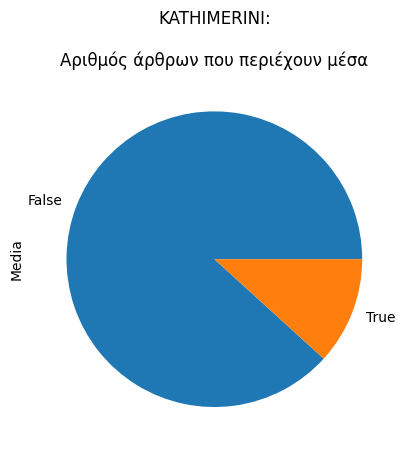

In [ ]:
short_df['Media'].value_counts().plot(kind='pie', title= 'KATHIMERINI:\n\nΑριθμός άρθρων που περιέχουν μέσα')

In [ ]:
import spacy

In [ ]:
# !python -m spacy download el_core_news_sm

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import spacy

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

βαθμούς κελσίου              169
πολιτικής προστασίας         135
μποφόρ θερμοκρασία           134
απε μπε                      123
γενικά αίθριος               122
νέα φιλαδέλφεια              114
σύμφωνα πληροφορίες           84
απογευματινές ώρες            75
καιρός γενικά                 70
πηγή απε                      65
πρόσκαιρες νεφώσεις           60
άνεμοι πνέουν                 58
κλιματικής κρίσης             52
κίνδυνος πυρκαγιάς            51
βόρειες διευθύνσεις           51
αίθριος καιρός                50
θερμοκρασία σημειώσει         49
δασικές πυρκαγιές             49
μεσημβρινές απογευματινές     48
σύμφωνα πυροσβεστική          47
dtype: int64

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

βαθμούς κελσίου         169
πολιτικής προστασίας    135
μποφόρ θερμοκρασία      134
απε μπε                 123
γενικά αίθριος          122
dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_df['text'])

results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

Παρουσιάζω τον βαθμό ομοιότητας των 10 πρώτων άρθρων

<Axes: title={'center': 'KATHIMERINI:\n\nΒαθμός ομοιότητας των 10 πρώτων άρθρων'}>

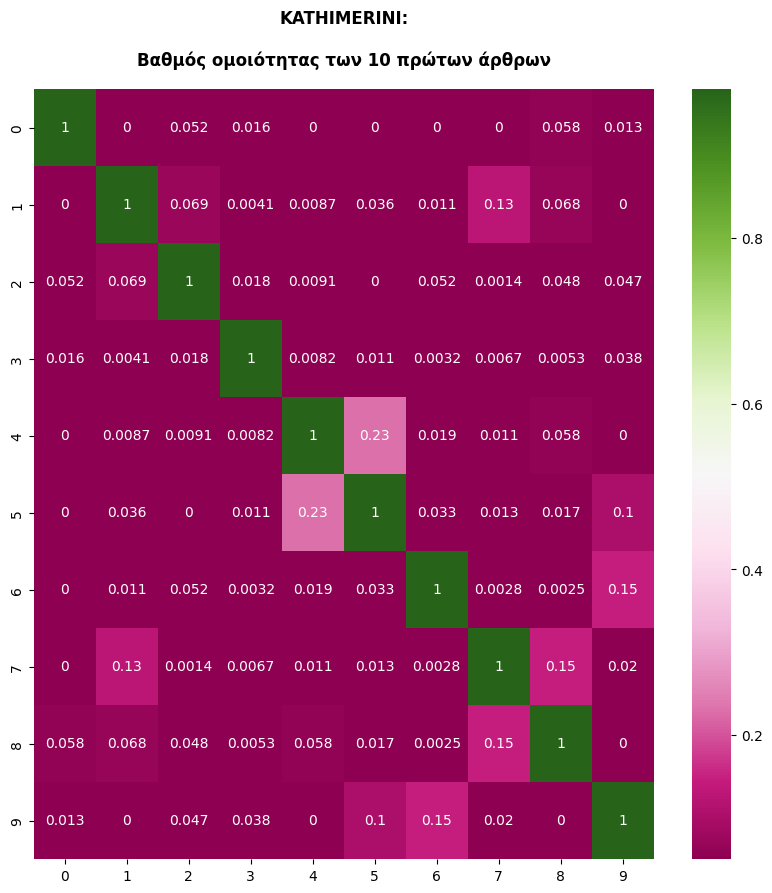

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.title('KATHIMERINI:\n\nΒαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG")

# Sentiment Analysis σε κείμενα

In [ ]:
filepath ='https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv'

In [ ]:
emolex_df = pd.read_csv(filepath)

emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']
negative_words = emolex_df[emolex_df.Negative == 1]['word']
angry_words = emolex_df[emolex_df.Anger == 1]['word']
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']
fear_words = emolex_df[emolex_df.Fear == 1]['word']
joy_words = emolex_df[emolex_df.Joy == 1]['word']
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
matrix = vec.fit_transform(short_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

Προσθέτουμε στο dataframe μια στήλη ανά συναίσθημα. Κάθε γραμμή της στήλης θα δείχνει το πόσες λέξεις που εκπροσωπούν το εκάστοτε συναίσθημα περιέχονται στο κείμενο του άρθρου

In [ ]:
text_emot = short_df

text_emot['anger'] = wordcount_df[angry_words].sum(axis=1)
text_emot['positive'] = wordcount_df[positive_words].sum(axis=1)
text_emot['joy'] = wordcount_df[joy_words].sum(axis=1)
text_emot['disgust'] = wordcount_df[disgust_words].sum(axis=1)
text_emot['surprise'] = wordcount_df[surprise_words].sum(axis=1)
text_emot['trust'] = wordcount_df[trust_words].sum(axis=1)
text_emot['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
text_emot['sadness'] = wordcount_df[sadness_words].sum(axis=1)
text_emot['negative'] = wordcount_df[negative_words].sum(axis=1)
text_emot['fear'] = wordcount_df[fear_words].sum(axis=1)

text_emot.reset_index(inplace=True)
text_emot.set_index('date', inplace=True)

Παρουσιάζω τον μέσο αριθμό λέξεων που αποτελούνται τα άρθρα της κάθε μέρας

<Axes: title={'center': 'KATHIMERINI:\n\nΜέσος όρος λέξεων στο κείμενο ανά ημέρα'}, xlabel='date'>

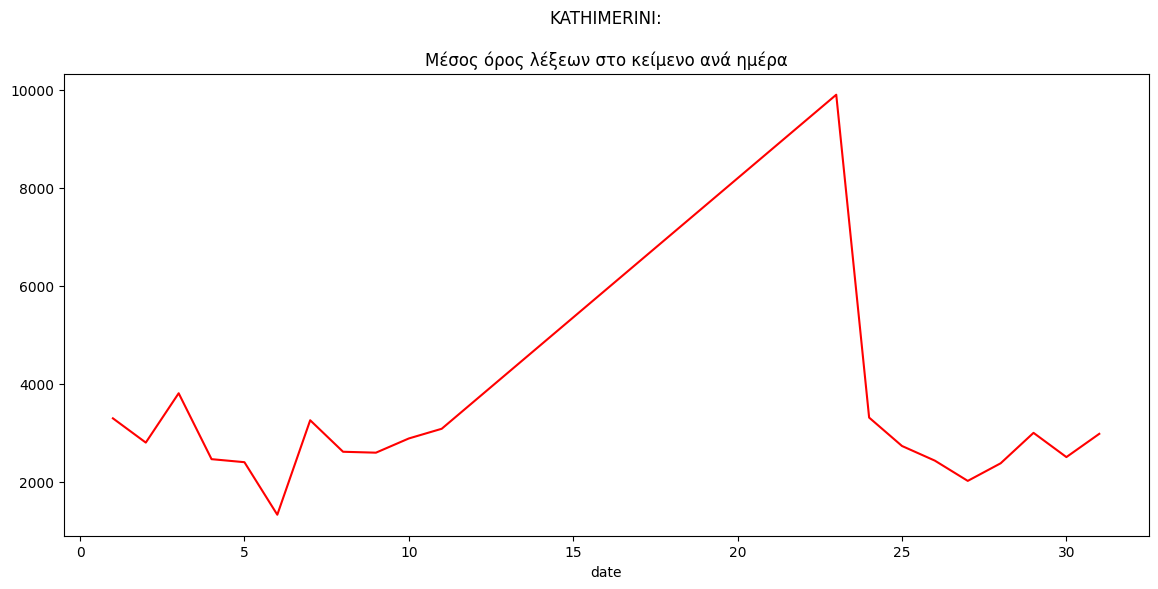

In [ ]:
short_df['text'].str.len().groupby(by=short_df.index.day).mean().plot(color="r", title='KATHIMERINI:\n\nΜέσος όρος λέξεων στο κείμενο ανά ημέρα',figsize=(14,6))

Παρουσιάζω τον μέσο αριθμό λέξεων που αποτελούνται τα άρθρα της κάθε μέρας, χρησιμοποιώντας το respample


<Axes: title={'center': 'KATHIMERINI:\n\nΜέσος αριθμός λέξεων στο κείμενο ανά ημέρα'}, xlabel='date'>

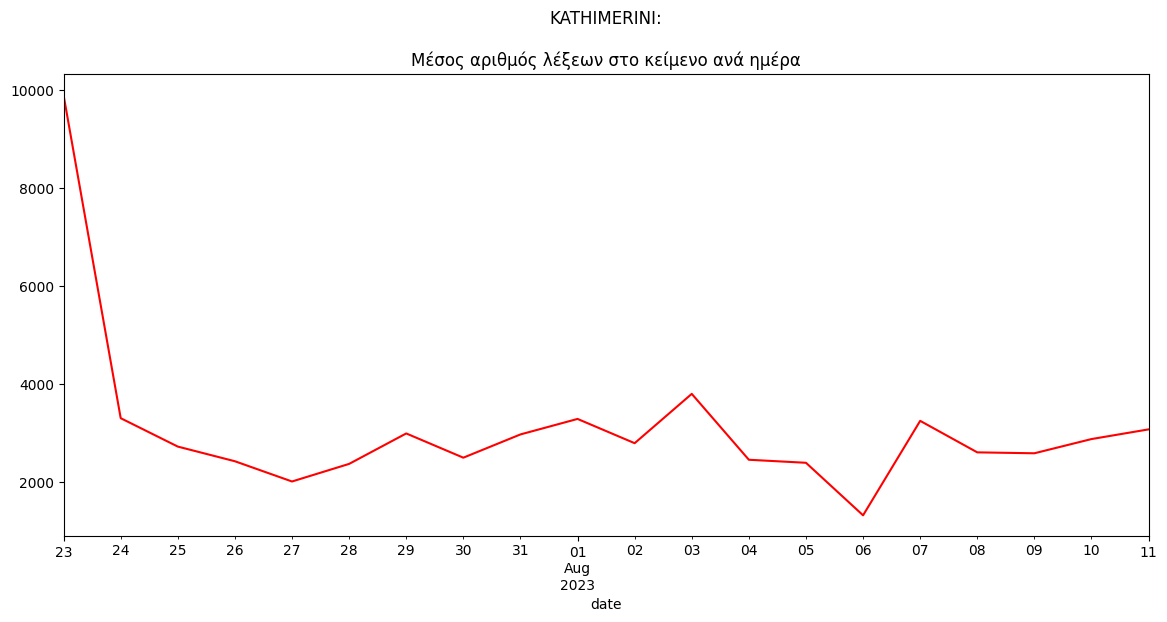

In [ ]:
short_df['text'].str.len().resample('D').mean().plot(color="r",title= 'KATHIMERINI:\n\nΜέσος αριθμός λέξεων στο κείμενο ανά ημέρα',figsize=(14,6))

<Axes: title={'center': 'KATHIMERINI:\n\nΜέσος αριθμός λέξεων στον τίτλο ανά ημέρα'}, xlabel='date'>

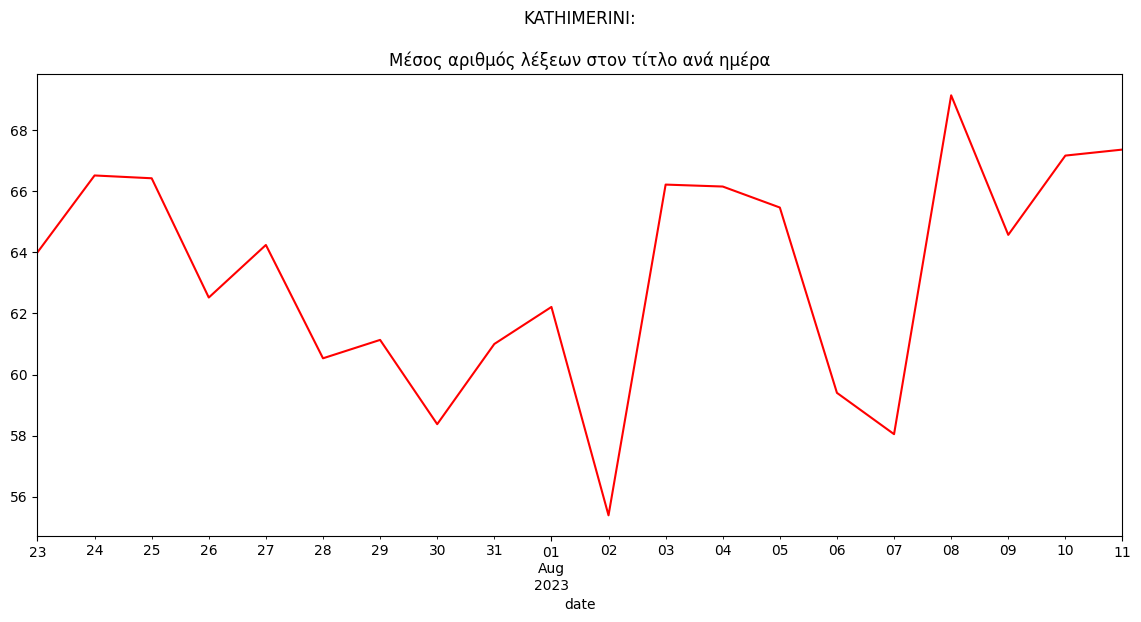

In [ ]:
short_df['title'].str.len().resample('D').mean().plot(color="r", title='KATHIMERINI:\n\nΜέσος αριθμός λέξεων στον τίτλο ανά ημέρα',figsize=(14,6))

Παρουσιάζω στο ίδιο διάγραμμα το άθροισμα των λέξεων με συναίσθημα εκνευρισμού και ευτυχίας που δημοσιεύτηκαν σε άρθρα ανά ημέρα

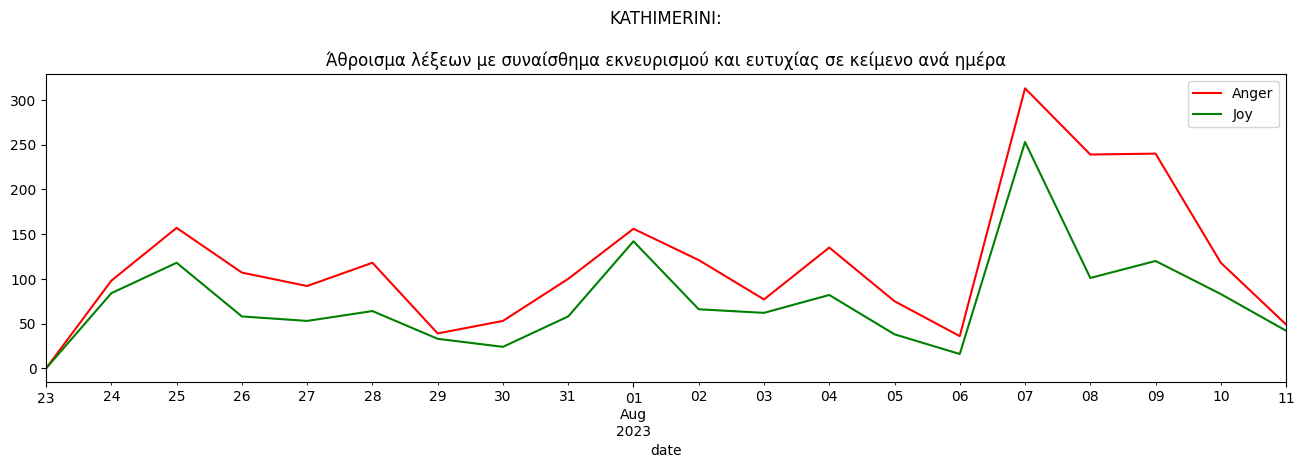

In [ ]:
ax = short_df['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_df['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green',title= 'KATHIMERINI:\n\nΆθροισμα λέξεων με συναίσθημα εκνευρισμού και ευτυχίας σε κείμενο ανά ημέρα')
plt.legend(['Anger', 'Joy'])

Παρουσιάζω στο ίδιο διάγραμμα το άθροισμα των λέξεων με συναίσθημα θετικό, αρνητικό και εμπιστοσύνης που δημοσιεύτηκαν σε άρθρα ανά ημέρα

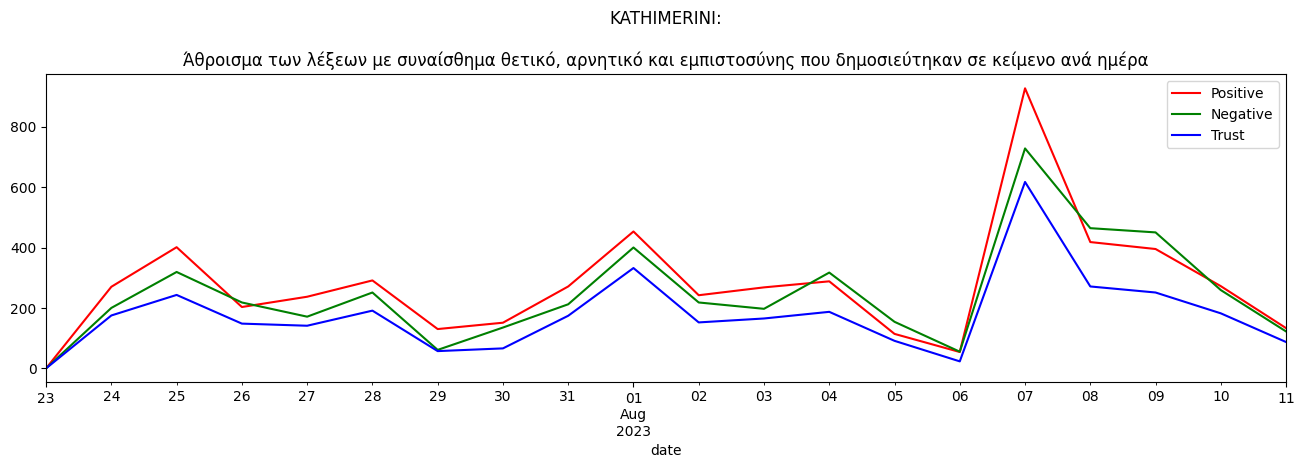

In [ ]:
ax = short_df['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_df['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_df['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'blue', title='KATHIMERINI:\n\nΆθροισμα των λέξεων με συναίσθημα θετικό, αρνητικό και εμπιστοσύνης που δημοσιεύτηκαν σε κείμενο ανά ημέρα')
plt.legend(['Positive', 'Negative', 'Trust'])

# Sentiment Analysis σε τίτλους

In [ ]:
matrix = vec.fit_transform(short_df['title'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)

In [ ]:
title_emot = short_df

title_emot['anger'] = wordcount_df[angry_words].sum(axis=1)
title_emot['positive'] = wordcount_df[positive_words].sum(axis=1)
title_emot['joy'] = wordcount_df[joy_words].sum(axis=1)
title_emot['disgust'] = wordcount_df[disgust_words].sum(axis=1)
title_emot['surprise'] = wordcount_df[surprise_words].sum(axis=1)
title_emot['trust'] = wordcount_df[trust_words].sum(axis=1)
title_emot['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
title_emot['sadness'] = wordcount_df[sadness_words].sum(axis=1)
title_emot['negative'] = wordcount_df[negative_words].sum(axis=1)
title_emot['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
title_emot.reset_index(inplace=True)
title_emot.set_index('date', inplace=True)

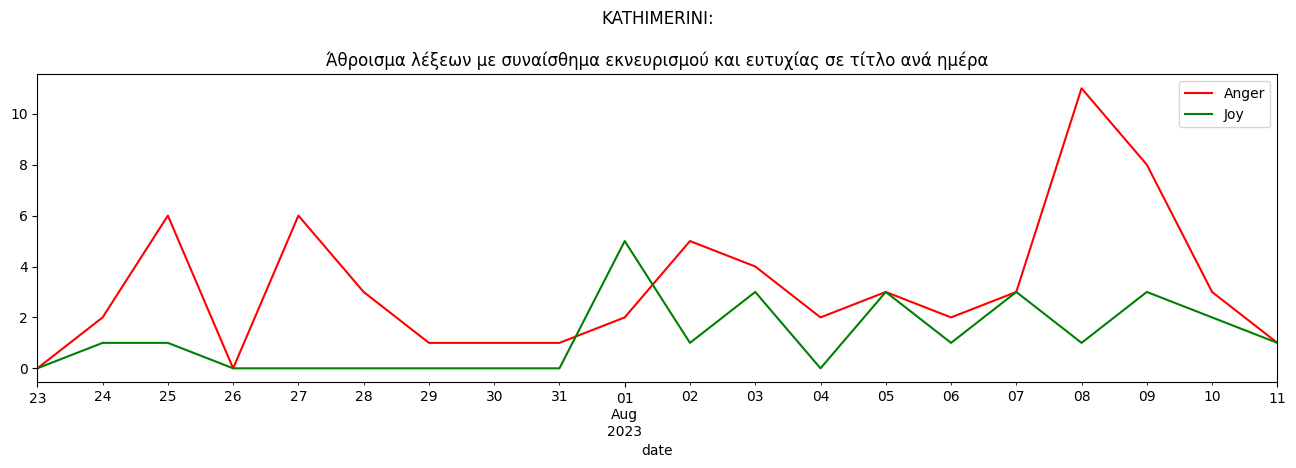

In [ ]:
ax = title_emot['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
title_emot['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green',title= 'KATHIMERINI:\n\nΆθροισμα λέξεων με συναίσθημα εκνευρισμού και ευτυχίας σε τίτλο ανά ημέρα')
plt.legend(['Anger', 'Joy'])

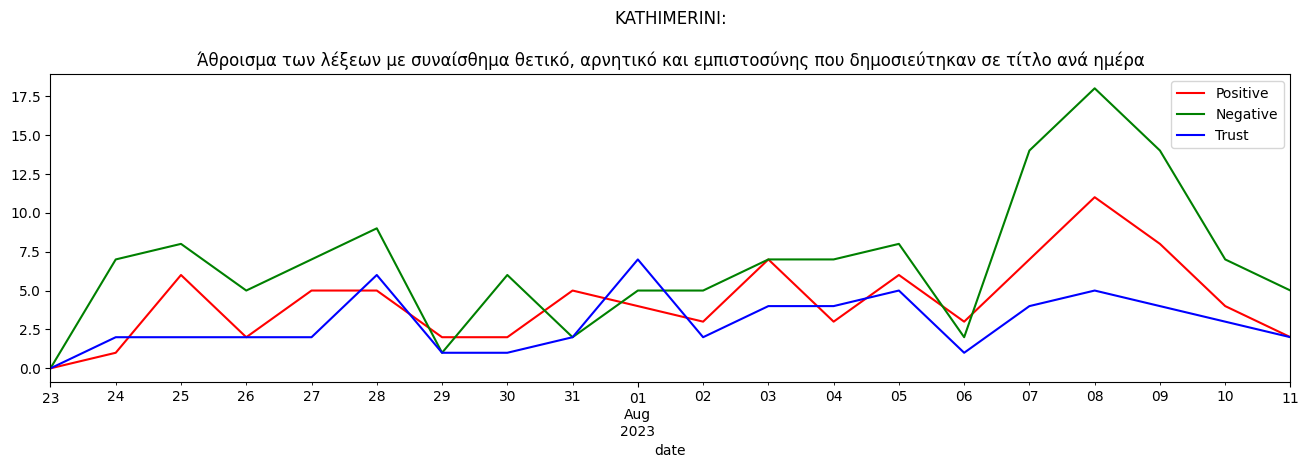

In [ ]:
ax_title = title_emot['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
title_emot['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax_title, color = 'green')
title_emot['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax_title, color = 'blue',title='KATHIMERINI:\n\nΆθροισμα των λέξεων με συναίσθημα θετικό, αρνητικό και εμπιστοσύνης που δημοσιεύτηκαν σε τίτλο ανά ημέρα')
plt.legend(['Positive', 'Negative', 'Trust'])

Εξάγω τον αριθμό σημείων στίξης που περιέχονται στα κείμενα των άρθρων

In [ ]:
import string

count = lambda l1,l2: sum([1 for x in l1 if x in l2])

data = []
for text in short_df['text']:

  words = text.split()

  count_punctuation = 0
  for word in words:
    count_punctuation += count(word,set(string.punctuation))

  data.append(count_punctuation)

short_df['punctuations_text'] = data

<Axes: title={'center': 'KATHIMERINI:\n\nΜέσος αριθμός σημείων στίξης στο κείμενο ανά ημέρα'}, xlabel='Day'>

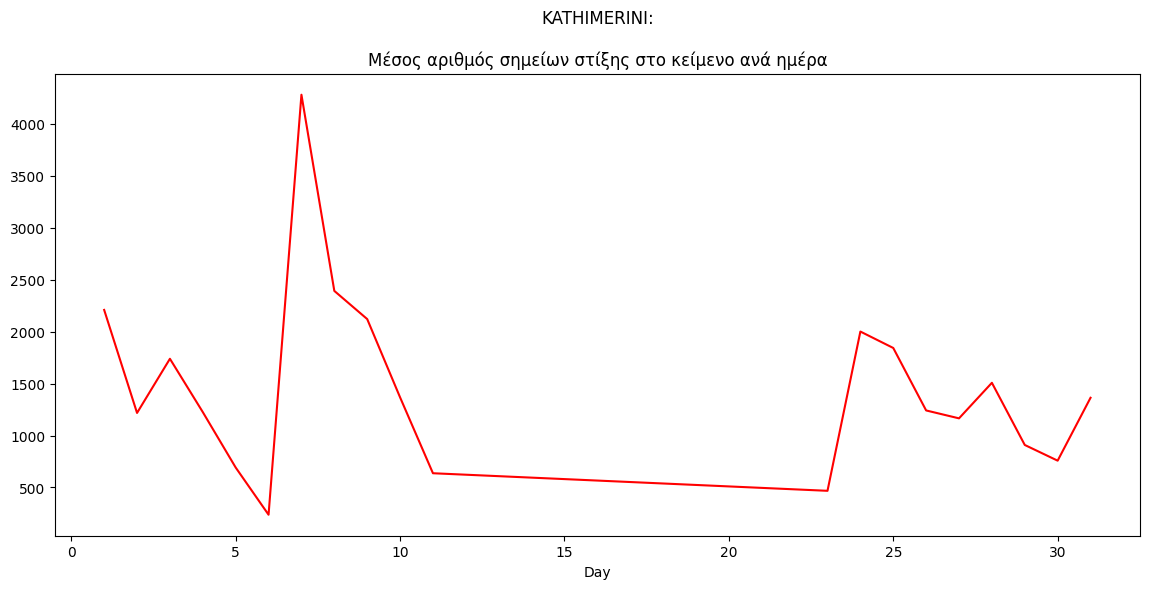

In [ ]:
short_df['punctuations_text'].groupby(by=short_df.Day).sum().plot(color="r",title='KATHIMERINI:\n\nΜέσος αριθμός σημείων στίξης στο κείμενο ανά ημέρα',figsize=(14,6))

<Axes: title={'center': 'KATHIMERINI:\n\nΜέσος αριθμός σημείων στίξης στο κείμενο ανά ημέρα'}, xlabel='Day'>

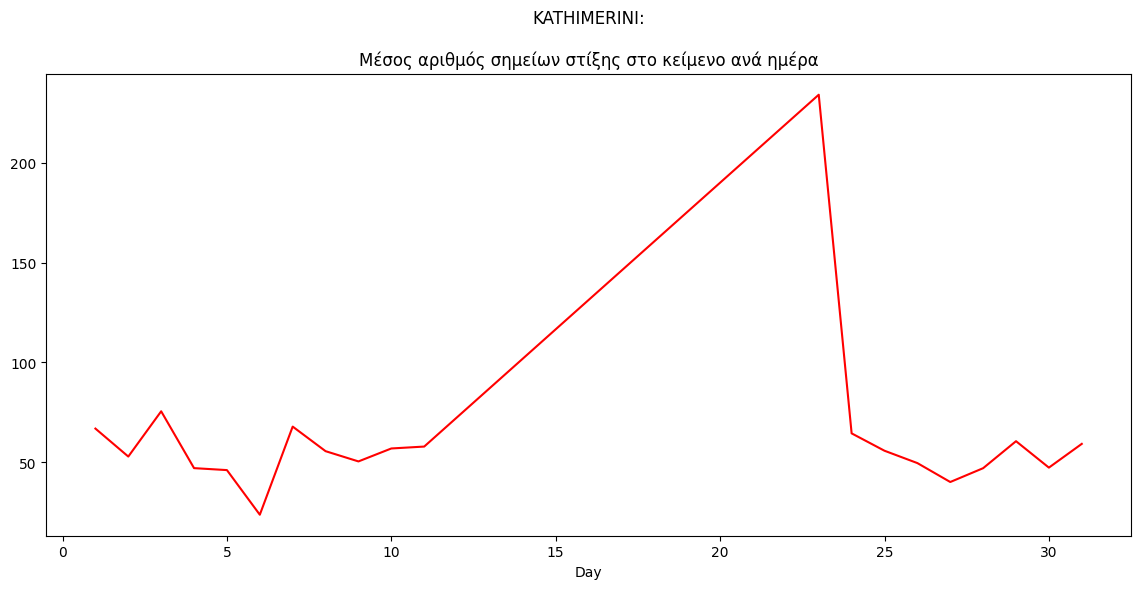

In [ ]:
short_df['punctuations_text'].groupby(by=short_df.Day).mean().plot(color="r",title='KATHIMERINI:\n\nΜέσος αριθμός σημείων στίξης στο κείμενο ανά ημέρα',figsize=(14,6))

Εξάγω τον αριθμό σημείων στίξης που περιέχονται στους τίτλους των άρθρων

In [ ]:
import string

count = lambda l1,l2: sum([1 for x in l1 if x in l2])

data = []

for row in short_df['title']:
  words = list(filter(lambda word: not any(char.isdigit()
                                         for char in word), row.split()))

  data.append(sum(count(word,set(string.punctuation)) for word in words))

short_df['punctuations_title'] = data

<Axes: title={'center': 'KATHIMERINI:\n\nΜέσος αριθμός σημείων στίξης σε τίτλο ανά ημέρα'}, xlabel='date'>

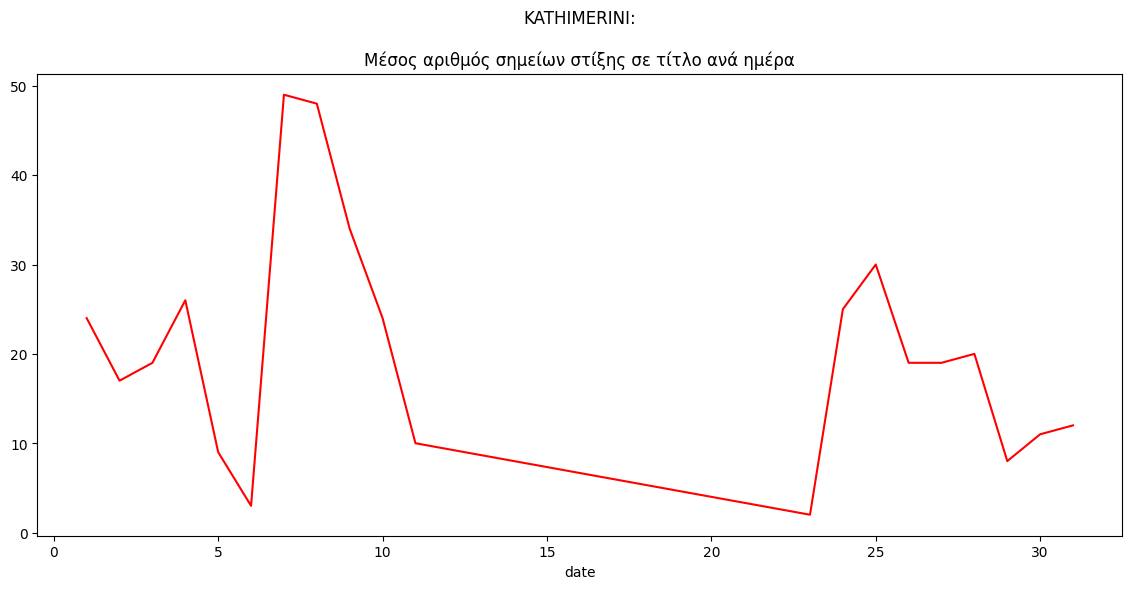

In [ ]:
short_df['punctuations_title'].groupby(by=short_df.index.day).sum().plot(color="r",title='KATHIMERINI:\n\nΜέσος αριθμός σημείων στίξης σε τίτλο ανά ημέρα',figsize=(14,6))

<Axes: title={'center': 'KATHIMERINI:\n\nΜέσος όρος σημείων στίξης σε τίτλο ανά ημέρα'}, xlabel='date'>

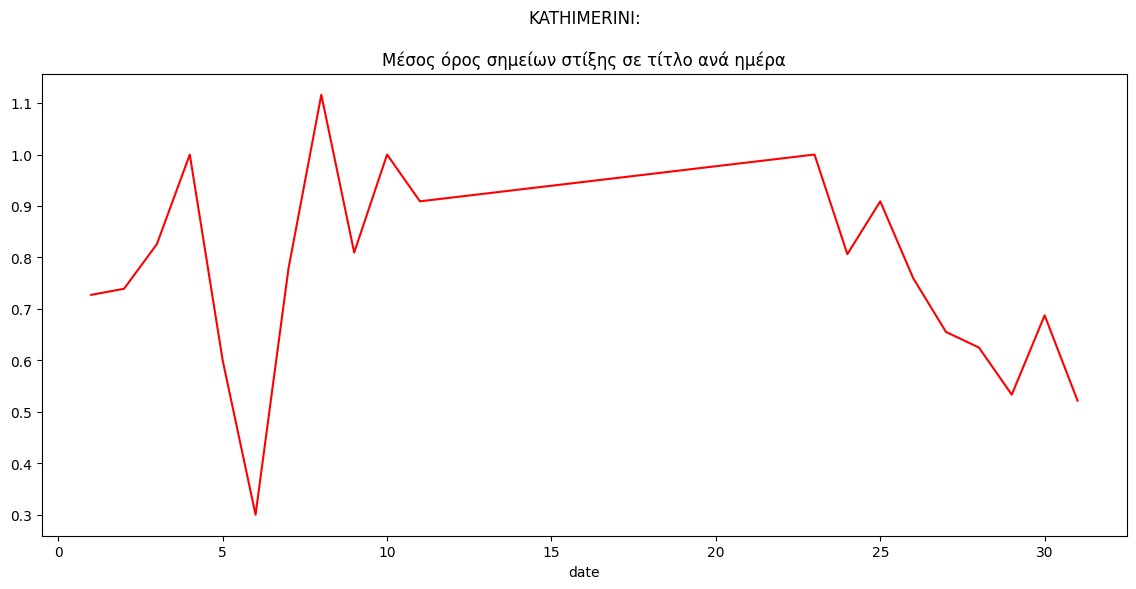

In [ ]:
short_df['punctuations_title'].groupby(by=short_df.index.day).mean().plot(color="r",title='KATHIMERINI:\n\nΜέσος όρος σημείων στίξης σε τίτλο ανά ημέρα',figsize=(14,6))

In [ ]:
short_df.to_csv("drive/MyDrive/short_kathimerini.csv", index=False)